In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from openpyxl import load_workbook

from develop.utils.paths import DATA, MODEL

from develop.utils.paths import DATA_ALT, MODEL

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

In [ ]:

fixed = "df_fixed_1920-2020.csv"
chain = "df_chain_1920-2020.csv"

df_fixed = pd.read_csv(os.path.join(DATA_ALT, "04_create_metrics", fixed), sep="|")
df_chain = pd.read_csv(os.path.join(DATA_ALT, "04_create_metrics", chain), sep="|")
df_fixed['ref_type'] = 'fixed_base'
df_chain['ref_type'] = 'chain_base'

df = pd.concat([df_fixed, df_chain], ignore_index=True)
df.head()

       index  count  count_t-1  year  ref_year  euclidean_distance  cosine_similarity  cross_entropy  kl_divergence    entropy  entropy_t-1      mean    median       std       iqr     range  word_present_both    ref_type
0        new  25314    19851.0  1921      1920            6.499378           0.920569      65.940946       1.124488  64.816458    64.533943  0.508250  0.514053  0.152954  0.173355  0.840166               True  fixed_base
1      today  16924    11878.0  1921      1920            7.239489           0.913828      67.048500       1.128585  65.919914    65.170323  0.515535  0.516587  0.138559  0.205474  0.731769               True  fixed_base
2  yesterday  16662    12618.0  1921      1920            8.801228           0.920027      64.415582       2.174559  62.241022    61.663743  0.518546  0.516444  0.184208  0.251544  0.927227               True  fixed_base
3        say  12984    10863.0  1921      1920            7.126332           0.894981      67.034375       1.286237 

In [32]:
def plot_metric_by_year(df, metric, top_n_words=None):
    """
    Plot boxplots of a single metric over years, grouped by ref_type.
    
    Parameters:
        df (pd.DataFrame): DataFrame with metric values and metadata.
        metric (str): The name of the metric column to plot.
        top_n_words (int or None): If provided, filters top-N frequent words in each year-ref group.
    """
    # Filter only words present in both years
    filtered_df = df[df['word_present_both'] == True].copy()

    # Optional: limit to top-N frequent words by 'count'
    if top_n_words:
        filtered_df = (
            filtered_df
            .sort_values(['year', 'ref_type', 'count'], ascending=[True, True, False])
            .groupby(['year', 'ref_type'])
            .head(top_n_words)
        )

    # Plot
    plt.figure(figsize=(30, 12))
    sns.boxplot(
        data=filtered_df,
        x='year',
        y=metric,
        hue='ref_type',
        palette='Set2',
        showfliers=False
    )

    plt.xticks(rotation=90, fontsize=20)
    plt.title(f'{metric.replace("_", " ").title()} by year (top {top_n_words or "all"} words)', fontsize=20)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel(metric.replace('_', ' ').title(), fontsize=20)
    plt.legend(title='Fixed or Chain', fontsize=20)
    plt.tight_layout()
    plt.show()
    


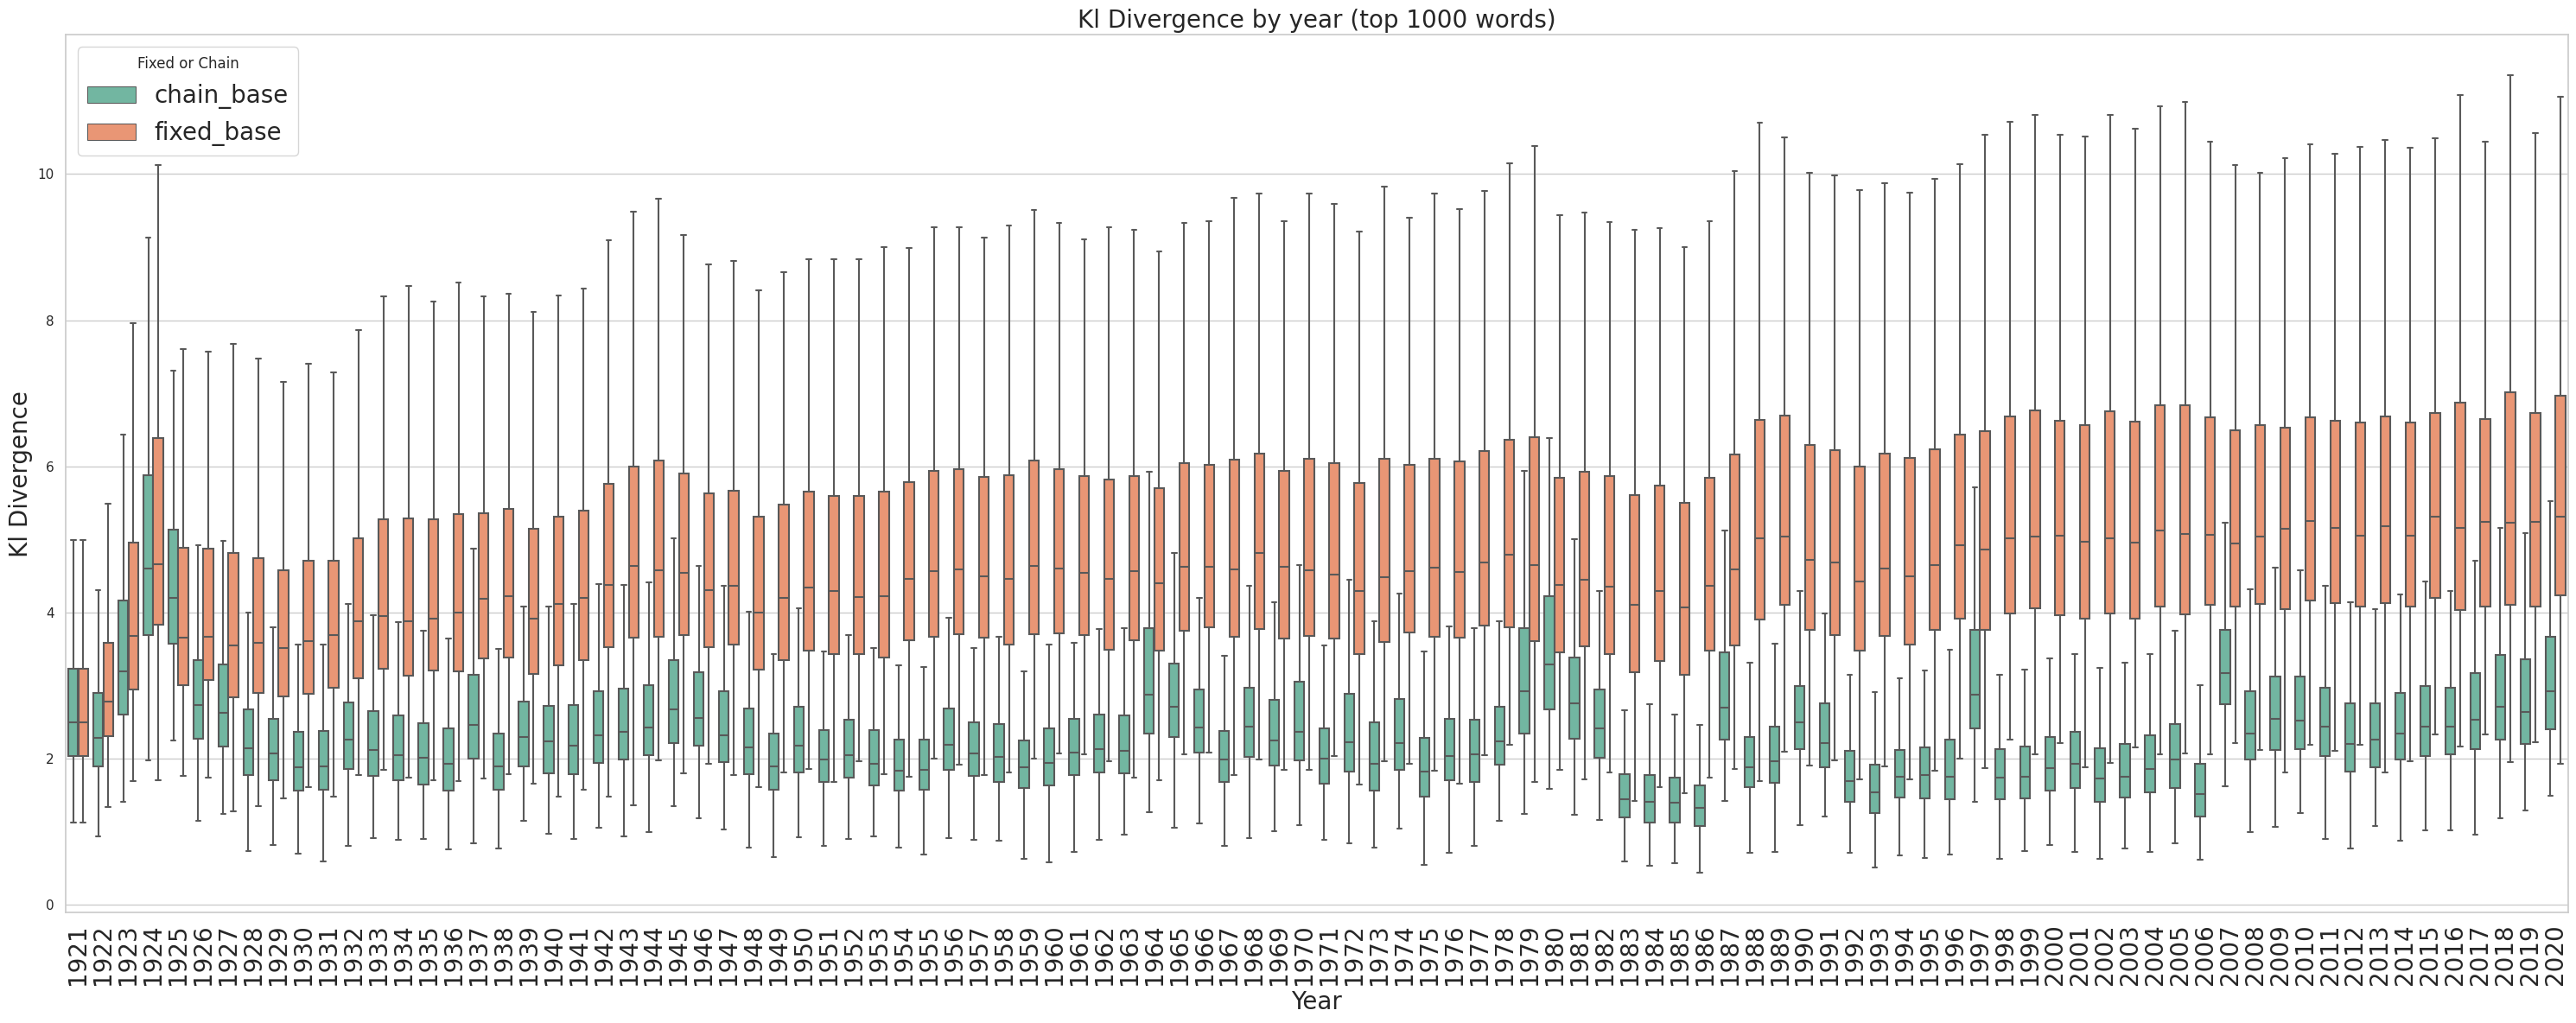

In [33]:
plot_metric_by_year(df, metric='kl_divergence', top_n_words=1000)

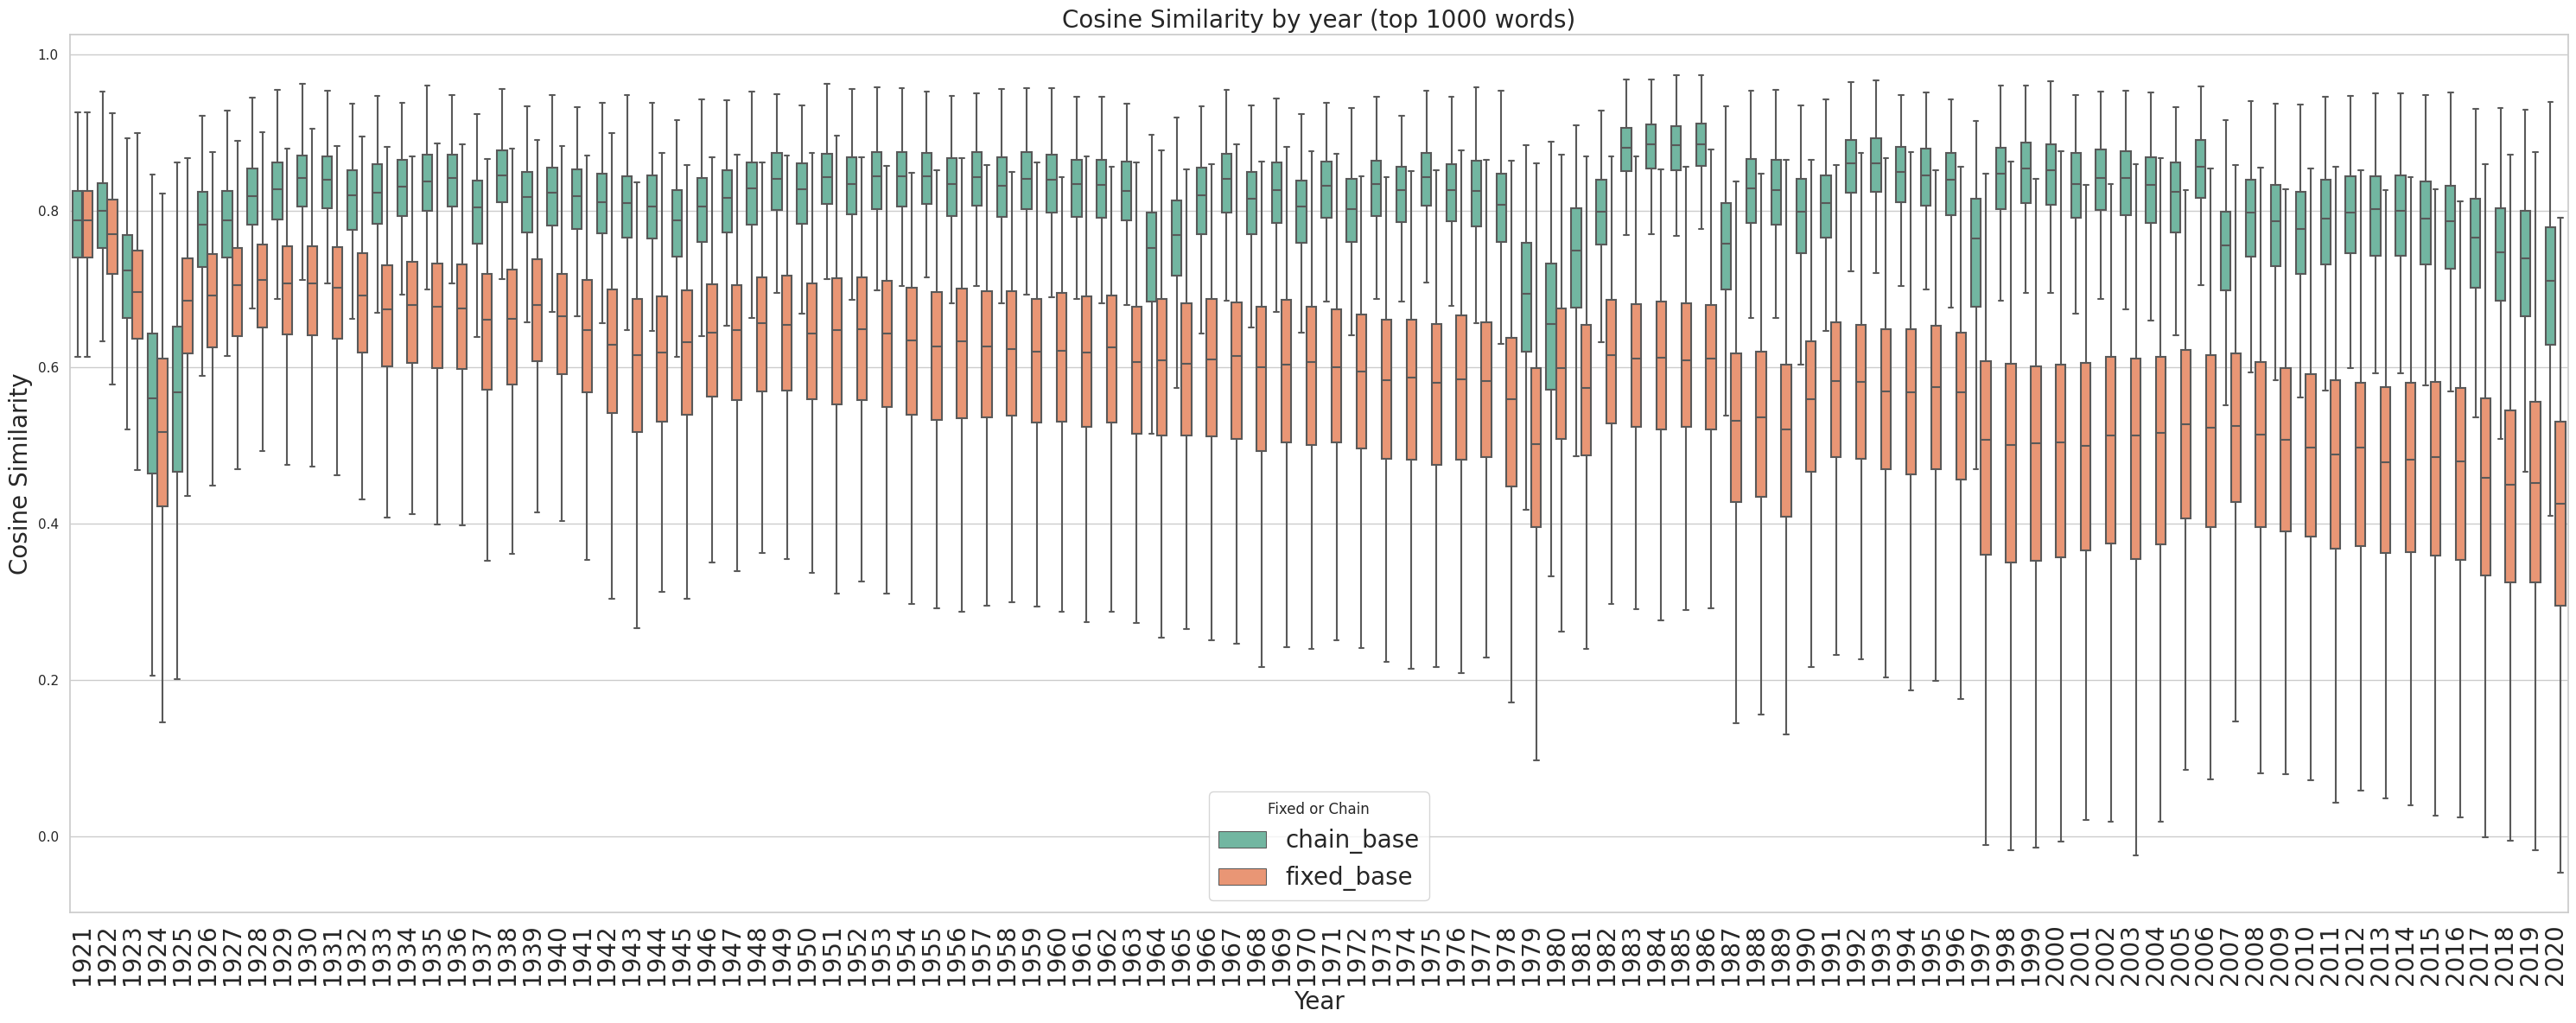

In [34]:
plot_metric_by_year(df, metric='cosine_similarity', top_n_words=1000)

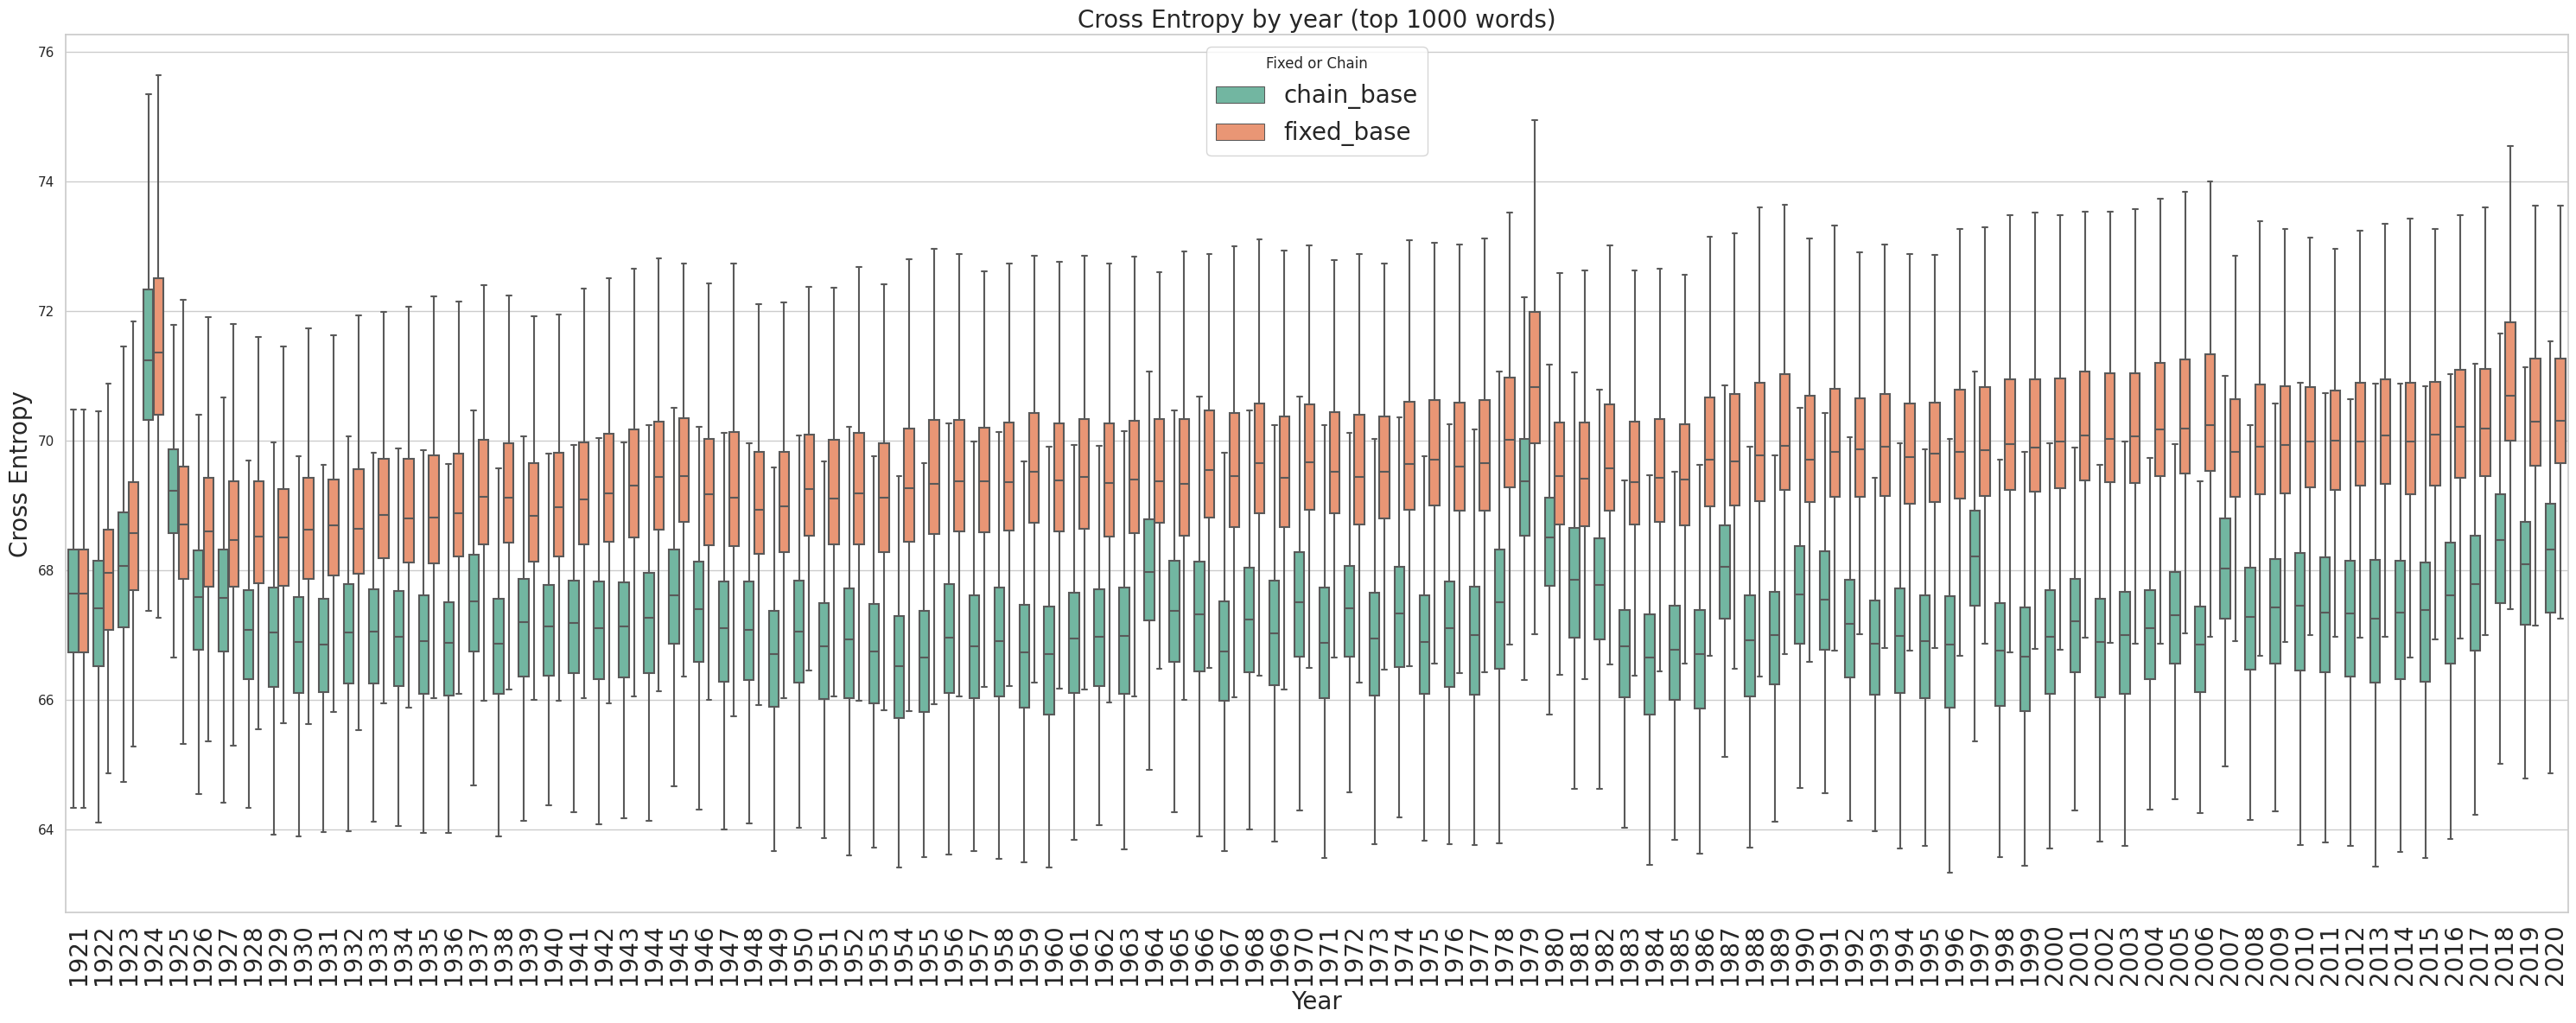

In [35]:
plot_metric_by_year(df, metric='cross_entropy', top_n_words=1000)

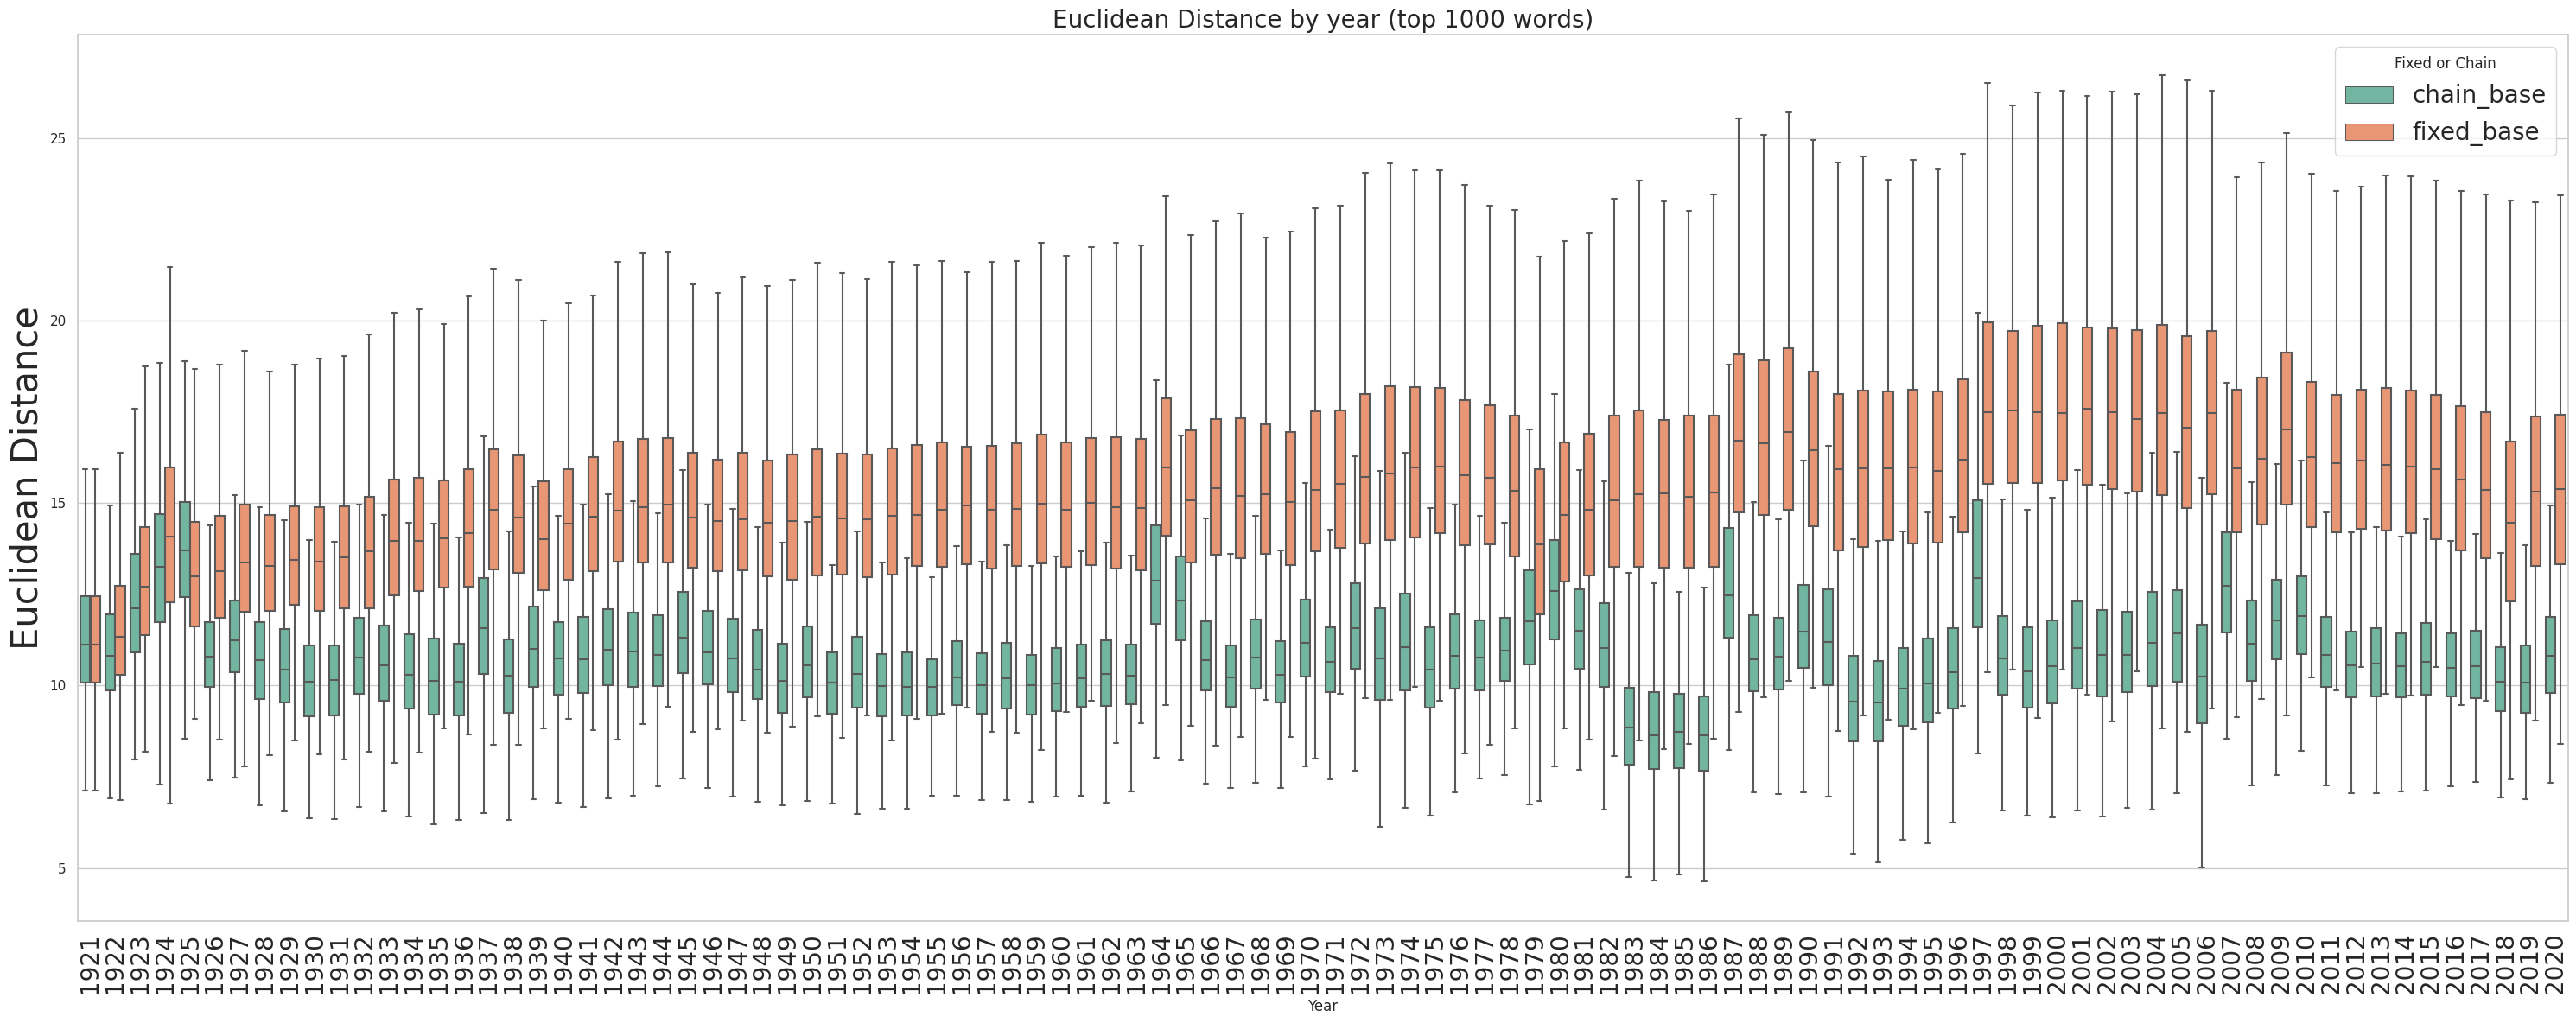

In [31]:
plot_metric_by_year(df, metric='euclidean_distance', top_n_words=1000)